<table>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
          Prepared by Berat Yenilen
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Y}{ \mymatrix{cc}{0 & -i \\ i & 0}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

# Quantum Fourier Transform 

We defined the Quantum Fourier Transform (QFT) operator on n qubits as follows: 
$$ QFT = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} \sum_{k=0}^{N-1} w_N^{jk} \ket{k}\bra{j}$$
where $w_N^{jk} = e^{2i\pi \frac{jk}{N}}$, $jk^{th}$ power of $N^{th}$ root of unity and $N= 2^n$. It is easy to see what $QFT$ does to a state $\ket{x}$:

$$ \ket{y} = \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} w_N^{xk} \ket{x} $$

Since $QFT$ operator is unitary we should be able to implement it using a quantum computer. Please quickly go over your lecture notes to remember how we implemented it.

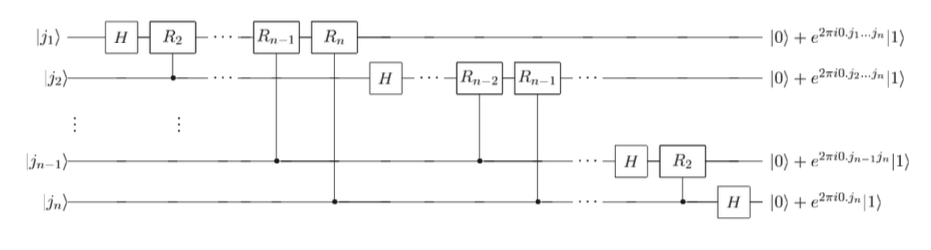

# Qiskit Implementation

To create the circuit for QFT, we need to learn how to define the controlled rotation gates in Qiskit, they are called $R_k$ in your lecture notes. In Qiskit, this gate we'll be using is defined as:

$$ CU1(\theta, c, t) = \begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\theta}
\end{bmatrix}
$$

Where $\theta = \frac{2\pi}{2^k} = \frac{\pi}{2^{k-1}}$ for $R_k$.

Let's write down a QFT on 4 qubits to see what we mean. The circuit diagram for 4 qubit case is shown below:

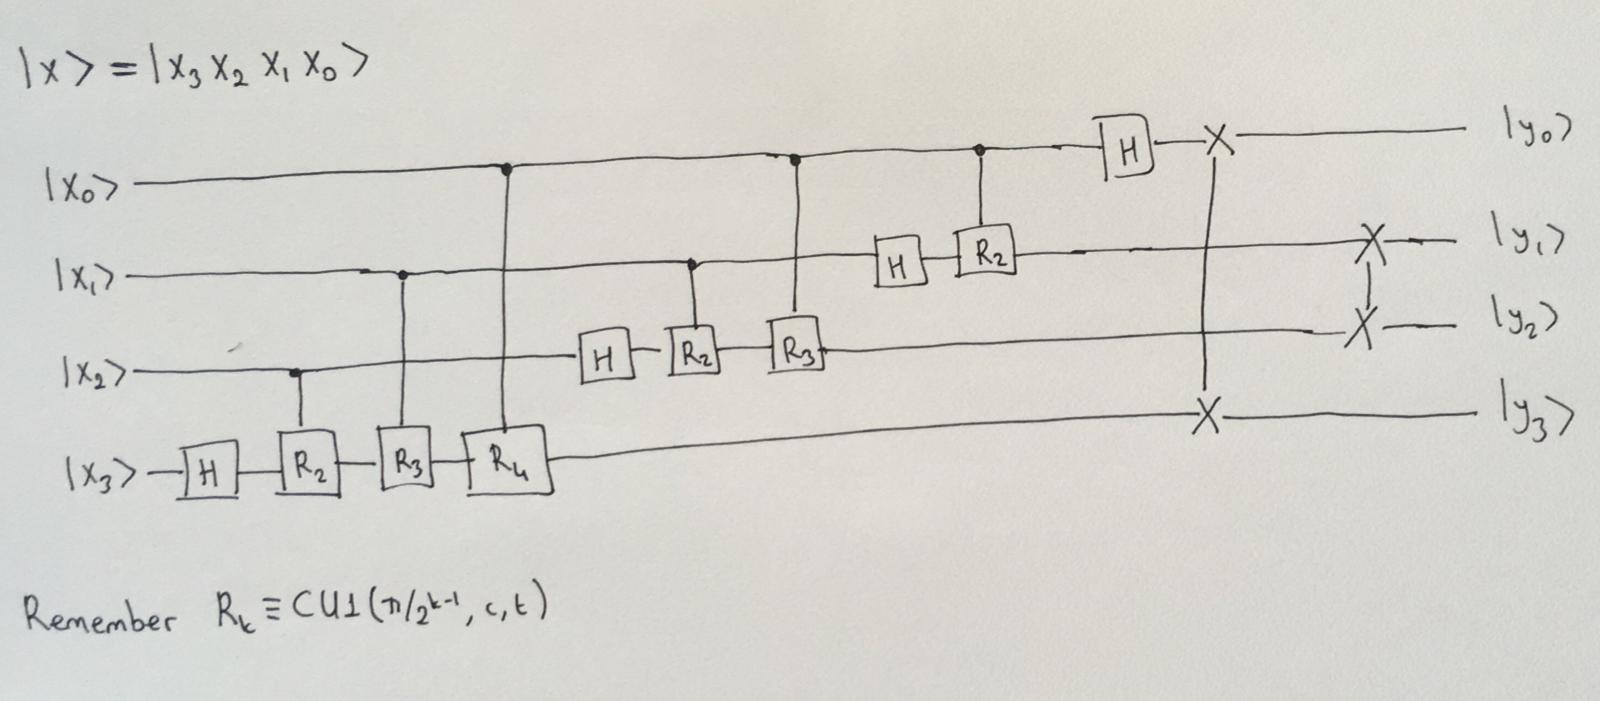

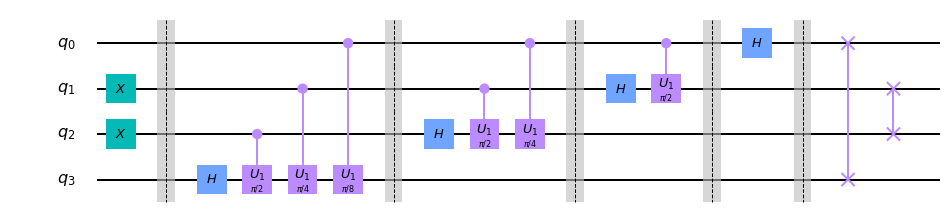

In [84]:
from math import pi
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Create a quantum circuit with 4 qubits.
qc = QuantumCircuit(4)

# State initialization
qc.x(1)
qc.x(2)
qc.barrier()

# Playing with |x3>
qc.h(3)
qc.cu1(pi/2, 2, 3)
qc.cu1(pi/4, 1, 3)
qc.cu1(pi/8, 0, 3)
qc.barrier()
#qc.draw(output='mpl')

# Playing with |x2>
qc.h(2)
qc.cu1(pi/2, 1, 2)
qc.cu1(pi/4, 0, 2)
qc.barrier()
#qc.draw(output='mpl')

# Playing with |x1> 
qc.h(1)
qc.cu1(pi/2, 0, 1)
qc.barrier()
#qc.draw(output='mpl')

# Apply Hadamard to the least significant qubit
qc.h(0)
qc.barrier() 

# Applying swap gates
qc.swap(0, 3)
qc.swap(1, 2)

qc.draw(output='mpl')

Let's run out circuit as it is and look at the result and see if it worked as expected.

In [85]:
job = execute(qc, Aer.get_backend('statevector_simulator'), shots=1)
statevector = job.result().get_statevector()
print(statevector)

[ 2.50000000e-01-6.12323400e-17j -1.76776695e-01+1.76776695e-01j
 -7.65404249e-17-2.50000000e-01j  1.76776695e-01+1.76776695e-01j
 -2.50000000e-01+6.12323400e-17j  1.76776695e-01-1.76776695e-01j
  7.65404249e-17+2.50000000e-01j -1.76776695e-01-1.76776695e-01j
  2.50000000e-01-6.12323400e-17j -1.76776695e-01+1.76776695e-01j
 -7.65404249e-17-2.50000000e-01j  1.76776695e-01+1.76776695e-01j
 -2.50000000e-01+6.12323400e-17j  1.76776695e-01-1.76776695e-01j
  7.65404249e-17+2.50000000e-01j -1.76776695e-01-1.76776695e-01j]


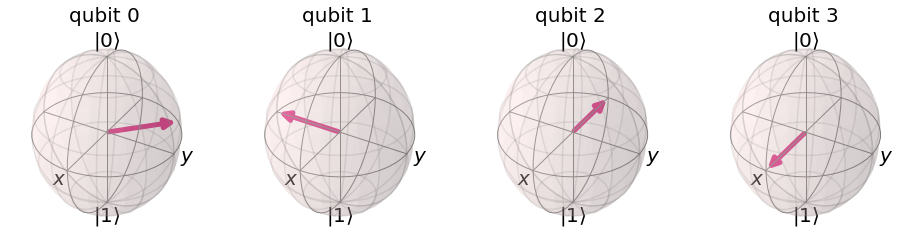

In [86]:
plot_bloch_multivector(statevector)

# A General QFT Function

Now that we have the basics, let's analyze the general Quantum Fourier Transform function defined in Qiskit textbook.

In [87]:
import numpy as np
from math import pi
from qiskit import QuantumCircuit, execute, Aer, IBMQ

def qft_rotations(circuit, n):
    if n == 0: # Exit function if circuit is empty
        return circuit
    n -= 1 # Indexes start from 0
    circuit.h(n) # Apply the H-gate to the most significant qubit
    for qubit in range(n): 
        # For each less significant qubit, we need to do a
        # smaller-angled controlled rotation: 
        circuit.cu1(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)
    
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit


# Exercise

As an exercise, I wrote down a function called $qft\_oracle(qc, n)$, which generates a random bitstring, initializes the given quantum circuit to it, applies QFT, and returns the generated bit string. You need to find out this secret bitstring by writing down the generalized version of the inverse Quantum Fourier Transform. By applying this inverse QFT on the circuit generated, you should be able to find out what the original bitstring was. 

In [37]:
%run oracles.py

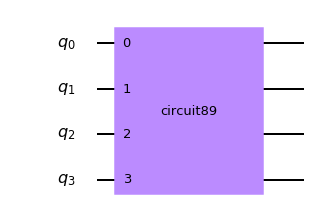

In [91]:
import numpy as np
from math import pi
from qiskit import QuantumCircuit, execute, Aer, IBMQ

# You can change this n value as you wish.
n = 4
qc = QuantumCircuit(n)
secret_bitstring = qft_oracle(qc, n)

def inverse_qft(qc, n):
    #
    #
    # Your code here
    # 
    # You don't really need to return something
    return 

# Uncomment the below line after you have defined inverse_qft
#inverse_qft(qc, n)

# Now, if you have defined your function you can run it again using statevector_simulator
job = execute(qc, Aer.get_backend('statevector_simulator'), shots=1)
statevector = job.result().get_statevector()

qc.draw(output='mpl')

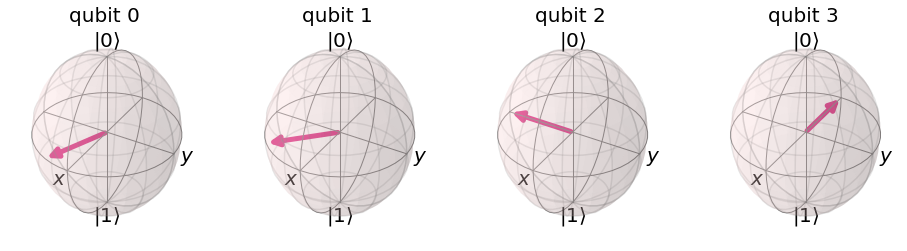

In [92]:
# Plot this statevector to see what was the bitstring produced.
plot_bloch_multivector(statevector)

In [93]:
# You can check your result by printing out the bitstring. 
# Ordering is correct, so if the secret_bitstring was 110, you should expect 
# to see 1 in qubit 0 and qubit 1, and 0 on qubit 2.
print(secret_bitstring)

1111
